<a href="https://colab.research.google.com/github/MiioCh/Python/blob/main/TrabalhoBiblioteca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deseja visualizar a lista de livros cadastrados? S/N N
Deseja procurar por um livro no banco de dados? S/N N
Quantos livros você deseja adicionar? Caso queira prosseguir sem adicionar livros, pressione a tecla G: G
O programa vai continuar para a parte do gráfico.


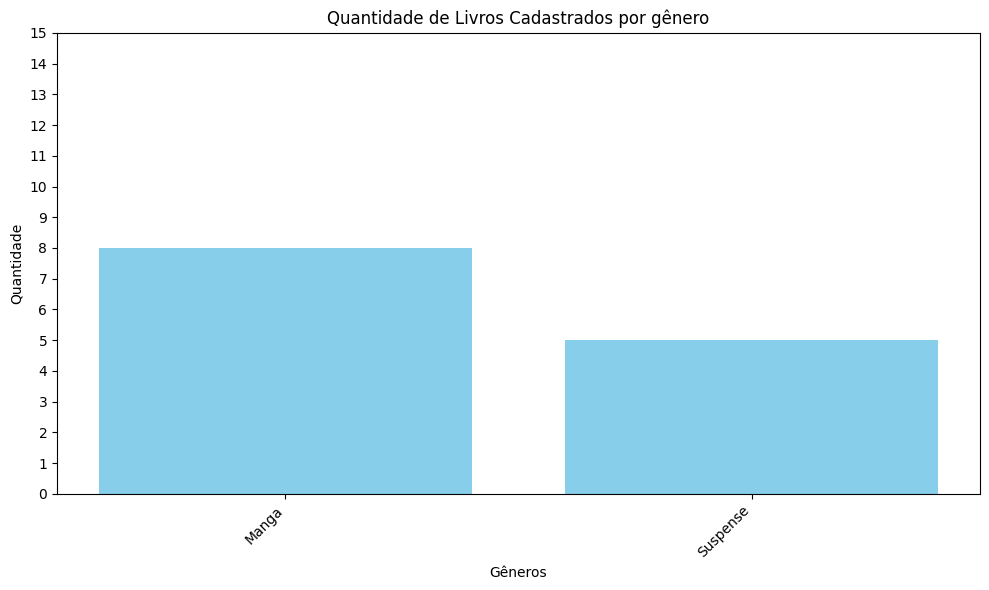

NameError: name 'numero_livros' is not defined

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#Conectar ao banco de dados
conn = sqlite3.connect('livros.db')
cursor = conn.cursor()

#Criar uma tabela se não existir
cursor.execute('''
    CREATE TABLE IF NOT EXISTS livros (
        titulo TEXT PRIMARY KEY,
        autor TEXT,
        ano TEXT,
        quantidade INTEGER,
        genero TEXT
    )
''')

class GraficoLivros:
    def __init__(self, db_name):
        self.conn = sqlite3.connect(db_name)

    def gerar_grafico(self):
        # Cria um DataFrame a partir da consulta SQL
        df_livros = pd.read_sql_query('SELECT genero, quantidade FROM livros', self.conn)

        # Criar o gráfico
        plt.figure(figsize=(10, 6))
        plt.bar(df_livros['genero'], df_livros['quantidade'], color='skyblue')
        plt.title('Quantidade de Livros Cadastrados por gênero')
        plt.xlabel('Gêneros')
        plt.ylabel('Quantidade')
        plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    def fechar_conexao(self):
        self.conn.close()

#Dicionário para armazenar livros
livros = {}

# Pergunta se quer visualizar os livros cadastrados no banco de dados
visualizar_livros = input("Deseja visualizar a lista de livros cadastrados? S/N ").strip().upper()
if visualizar_livros == "S":
    # Cria um DataFrame a partir da consulta SQL
    df_livros = pd.read_sql_query('SELECT * FROM livros', conn)
    display(df_livros)  # Exibe o DataFrame usando display

if visualizar_livros == "N":
    # Ferramenta de procurar livros, deve retornar o nome e as informações referente ao livro
    procura_livros = input("Deseja procurar por um livro no banco de dados? S/N ").strip().upper()
if procura_livros == "S":
    titulo = input("Informe o título do livro que deseja procurar: ")
    consulta = cursor.execute('SELECT * FROM livros WHERE titulo = ?', (titulo,)).fetchone()

    #Aqui diz que se o titulo for igual à algo que está na consulta dentro do banco de dados, é para retornar todos os valores
    consulta = cursor.execute('SELECT * FROM livros WHERE titulo = ?', (titulo,)).fetchone()
    if consulta:
        if consulta:
            titulo_encontrado, autor, ano, quantidade = consulta
            print(f"'{titulo_encontrado} de {autor},{ano}, genero {genero} tem {quantidade} unidades")
        alterar = input("Você deseja alterar as informações desse livro? S/N ").strip().upper()
        if alterar == "S":
            cursor.execute('UPDATE livros SET autor = ?, ano = ?, quantidade = ?, genero = ? WHERE titulo = ?',
                           (autor, ano, quantidade, titulo, genero))
            print(f"As informações do livro '{titulo}' foram atualizadas.")
        else:
            print("As informações do livro não foram alteradas.")
    else:
        livros[titulo] = {'autor': autor, 'ano': ano, 'quantidade': quantidade, 'genero': genero}
        cursor.execute('INSERT INTO livros (titulo, autor, ano, quantidade) VALUES (?, ?, ?, ?, ?)',
                       (titulo, autor, ano, quantidade, genero))



#Pergunta ao usuário quantos livros ele quer adicionar
entrada = input("Quantos livros você deseja adicionar? Caso queira prosseguir sem adicionar livros, pressione a tecla G: ")

if entrada.upper() == "G":
    print("O programa vai continuar para a parte do gráfico.")
    GraficoLivros('livros.db').gerar_grafico()
    exit()
else:
    try:
        numero_livros = int(entrada)
        if numero_livros <= 0:
            print("O número de livros deve ser maior que zero.")
            exit()
    except ValueError:
        print("Por favor, insira um número válido ou 'G' para continuar.")
        exit()




# Contador para adicionar os livros
contador = 0

while contador < numero_livros:
    entrada = input("Informe o título, autor, ano do livro, quantidade e seu gênero (separados por vírgula): ")
    titulo, autor, ano, quantidade, genero = map(str.strip, entrada.split(','))
    quantidade = int(quantidade)  # Converte para inteiro
    livros[titulo] = {'autor': autor, 'ano': ano, 'quantidade': quantidade, 'genero': genero}
    contador += 1


# Faz a inserção dos livros no banco de dados
for titulo, info in livros.items():
    cursor.execute('INSERT INTO livros (titulo, autor, ano, quantidade, genero) VALUES (?, ?, ?, ?, ?)',
                   (titulo, info['autor'], info['ano'], info['quantidade'], info['genero']))
    print("O livro foi inserido no banco de dados com sucesso!")




conn.commit()

# Fechar a conexão
conn.close()

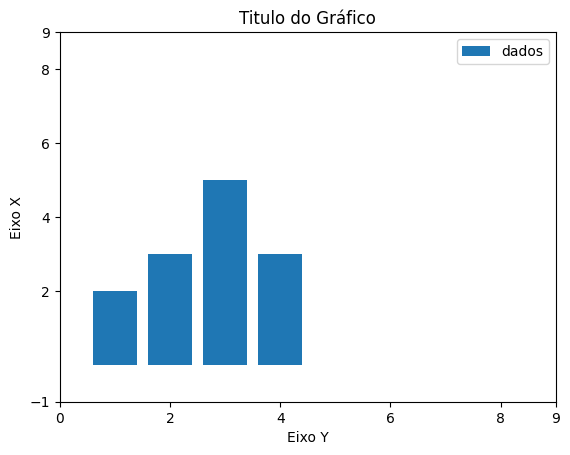

In [ ]:
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [2,3,5,3]
plt.bar(x, y, label = 'dados')
plt.xlabel ('Eixo Y')
plt.ylabel ('Eixo X')
plt.xticks([0,2,4,6,8,9])
plt.yticks([-1,2,4,6,8,9])
plt.legend()
plt.title('Titulo do Gráfico')
plt.show()



# New Section